**TEXT PREPROCESSING**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)

    # Lowercasing and removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

    return " ".join(filtered_words)
text='''In a bustling city, there was a little cafe tucked away on a quiet street corner. It was named "The Cozy Cup," and it had a charm that drew people in from all walks of life. The cafe's owner, an elderly woman named Clara, had a magical touch with coffee and a heart full of stories.
Every morning, Clara brewed the finest coffee and served it with a warm smile. The aroma of freshly ground beans enveloped the cafe, creating an inviting atmosphere. Regulars and newcomers alike found solace in the cafe's cozy ambiance.
One rainy afternoon, a young musician named Alex stumbled upon The Cozy Cup. Cold and wet, Alex entered seeking refuge from the storm. Clara welcomed the newcomer with a steaming cup of coffee and a comforting slice of apple pie. They struck up a conversation, and Alex shared tales of their musical journey.
Impressed by Alex's passion, Clara offered the cafe as a venue for impromptu performances. Word quickly spread, and soon, The Cozy Cup became a haven for local musicians. The cafe's walls echoed with the sweet melodies of guitars, pianos, and heartfelt lyrics.
As the days turned into months, Alex's music brought the cafe to life, and the cafe, in turn, helped Alex find their muse. The Cozy Cup was no longer just a cafe; it was a place where dreams were born and nurtured.
One sunny afternoon, Alex's music attracted the attention of a talent scout sitting in the corner. The scout was captivated by the raw talent on display and offered Alex a record deal on the spot. Clara beamed with pride as her cafe played a role in launching Alex's career.
The Cozy Cup continued to thrive, and Clara's dream of fostering creativity and community was realized. It became a place where people found more than just great coffee; they found inspiration, friendship, and the magic of following their passions.
And so, in the heart of the city, a small cafe named The Cozy Cup brewed not only exceptional coffee but also the dreams of those who walked through its door—a place where a chance encounter between a talented musician and a caring cafe owner changed lives forever.'''


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from pprint import pprint
cleaned_txt= preprocess_text(text)
pprint(cleaned_txt)

('bustling city little cafe tucked away quiet street corner named cozy cup '
 'charm drew people walks life cafe owner elderly woman named clara magical '
 'touch coffee heart full stories every morning clara brewed finest coffee '
 'served warm smile aroma freshly ground beans enveloped cafe creating '
 'inviting atmosphere regulars newcomers alike found solace cafe cozy ambiance '
 'one rainy afternoon young musician named alex stumbled upon cozy cup cold '
 'wet alex entered seeking refuge storm clara welcomed newcomer steaming cup '
 'coffee comforting slice apple pie struck conversation alex shared tales '
 'musical journey impressed alex passion clara offered cafe venue impromptu '
 'performances word quickly spread soon cozy cup became local musicians cafe '
 'walls echoed sweet melodies guitars pianos heartfelt lyrics days turned '
 'months alex music brought cafe life cafe turn helped alex find muse cozy cup '
 'longer cafe place dreams born nurtured one sunny afternoon alex m

**SENTIMENT ANALYSIS**

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    if sentiment_scores['compound'] >= 0.05:
        sentiment = "Positive"
    elif sentiment_scores['compound'] <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
senti_anal=analyze_sentiment(text)
pprint(senti_anal)

'Positive'


**TOKENIZATION**

In [ ]:
from nltk import sent_tokenize
sentences = sent_tokenize(cleaned_txt)
pprint(sentences)





['bustling city little cafe tucked away quiet street corner named cozy cup '
 'charm drew people walks life cafe owner elderly woman named clara magical '
 'touch coffee heart full stories every morning clara brewed finest coffee '
 'served warm smile aroma freshly ground beans enveloped cafe creating '
 'inviting atmosphere regulars newcomers alike found solace cafe cozy ambiance '
 'one rainy afternoon young musician named alex stumbled upon cozy cup cold '
 'wet alex entered seeking refuge storm clara welcomed newcomer steaming cup '
 'coffee comforting slice apple pie struck conversation alex shared tales '
 'musical journey impressed alex passion clara offered cafe venue impromptu '
 'performances word quickly spread soon cozy cup became local musicians cafe '
 'walls echoed sweet melodies guitars pianos heartfelt lyrics days turned '
 'months alex music brought cafe life cafe turn helped alex find muse cozy cup '
 'longer cafe place dreams born nurtured one sunny afternoon alex m

**TOPIC MODELLING**

In [ ]:
!pip install gensim
import gensim
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint

text_doc=sentences[0:10]

# Tokenize and preprocess the documents
tokenized_documents = [txt.split() for txt in text_doc]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(tokenized_documents)
corpus = [dictionary.doc2bow(txt) for txt in tokenized_documents]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# Print the topics and their keywords
pprint(lda_model.print_topics())

# To assign topics to a new document
new_document = "Text analysis is important for understanding data."
new_bow = dictionary.doc2bow(new_document.split())
topic_distribution = lda_model[new_bow]
print(topic_distribution)


[(0,
  '0.007*"cafe" + 0.007*"alex" + 0.007*"cozy" + 0.007*"clara" + 0.007*"cup" + '
  '0.007*"coffee" + 0.007*"named" + 0.007*"place" + 0.007*"found" + '
  '0.007*"dreams"'),
 (1,
  '0.043*"cafe" + 0.033*"alex" + 0.026*"cup" + 0.026*"cozy" + 0.022*"clara" + '
  '0.019*"coffee" + 0.015*"named" + 0.012*"found" + 0.012*"place" + '
  '0.009*"scout"')]
[(0, 0.5), (1, 0.5)]


**VISUALISATION OF WORD FREQUENCY COUNT**

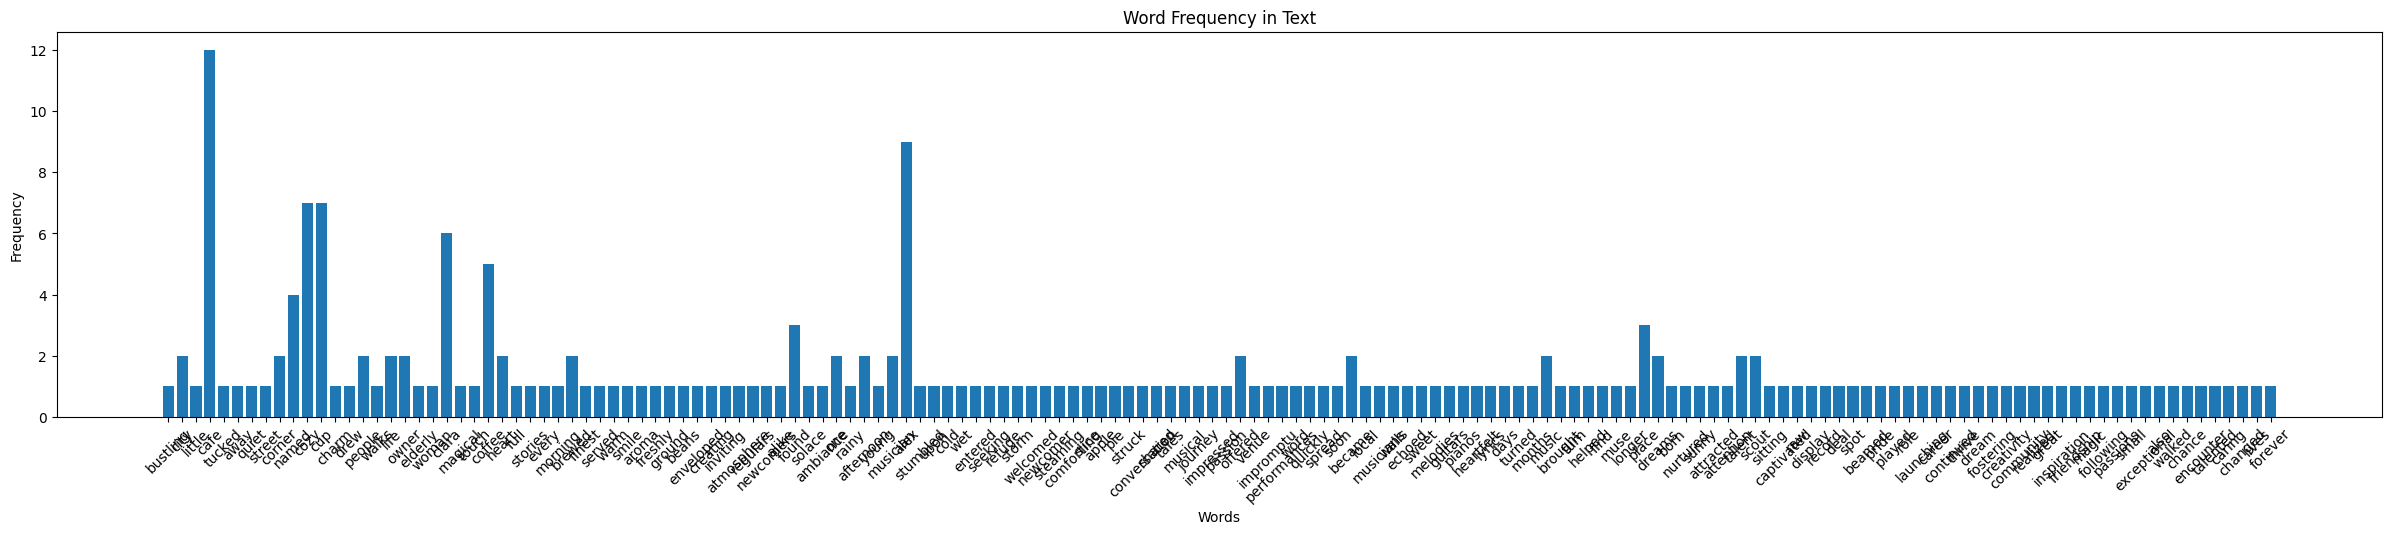

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Tokenize the text and count word frequencies
words = cleaned_txt.split()
word_counts = Counter(words)

# Create a bar chart
plt.figure(figsize=(30, 5))
plt.bar(word_counts.keys(), word_counts.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency in Text')
plt.xticks(rotation=45)
plt.show()


**TEXT SUMMARIZATION**

In [ ]:
from nltk.util import ngrams
from nltk.cluster.util import cosine_distance
import networkx as nx
from nltk.probability import FreqDist
import numpy as np
sentences = sent_tokenize(text)
words = [word_tokenize(sentence.lower()) for sentence in sentences]
stop_words = set(stopwords.words('english'))
filtered_words = []
for sentence_words in words:
  filtered_words.append([word for word in sentence_words if word.isalnum() and word not in stop_words])
word_freq = FreqDist(np.concatenate(filtered_words))
tfidf_scores = {}
for sentence_words in filtered_words:
  for word in sentence_words:
    if word in word_freq:
      tfidf_scores[word] = word_freq[word]
sentence_scores = {}
for i, sentence_words in enumerate(filtered_words):
  score = 0
  for word in sentence_words:
    score += tfidf_scores[word]
  sentence_scores[i] = score
summary_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)[:5]
summary = [sentences[i] for i in summary_sentences]

print("\n".join(summary))

And so, in the heart of the city, a small cafe named The Cozy Cup brewed not only exceptional coffee but also the dreams of those who walked through its door—a place where a chance encounter between a talented musician and a caring cafe owner changed lives forever.
As the days turned into months, Alex's music brought the cafe to life, and the cafe, in turn, helped Alex find their muse.
The cafe's owner, an elderly woman named Clara, had a magical touch with coffee and a heart full of stories.
One rainy afternoon, a young musician named Alex stumbled upon The Cozy Cup.
Impressed by Alex's passion, Clara offered the cafe as a venue for impromptu performances.


**KEYWORD EXTRACTION**

In [ ]:
!pip install rake_nltk
from rake_nltk import Rake
rake_nltk_var = Rake()
rake_nltk_var.extract_keywords_from_text(text)
keyword_extracted = rake_nltk_var.get_ranked_phrases()
print("keyword extracted ")
print(keyword_extracted)

keyword extracted 
['caring cafe owner changed lives forever', 'young musician named alex stumbled upon', 'freshly ground beans enveloped', 'newcomers alike found solace', 'alex entered seeking refuge', 'little cafe tucked away', 'elderly woman named clara', 'word quickly spread', 'one sunny afternoon', 'one rainy afternoon', 'helped alex find', 'alex shared tales', 'small cafe named', 'cozy cup continued', 'cozy cup ,"', 'quiet street corner', 'cozy cup brewed', 'talent scout sitting', 'cozy cup became', 'talented musician', 'cozy cup', 'cozy cup', 'people found', 'found inspiration', 'clara brewed', 'steaming cup', 'cozy ambiance', 'offered alex', 'launching alex', 'raw talent', 'clara welcomed', 'clara offered', 'clara beamed', 'warm smile', 'walls echoed', 'sweet melodies', 'record deal', 'musical journey', 'music brought', 'music attracted', 'magical touch', 'local musicians', 'inviting atmosphere', 'impromptu performances', 'heartfelt lyrics', 'fostering creativity', 'every morni